<a href="https://colab.research.google.com/github/ayandevofficial/Smart-Movie-Review-Analyzer/blob/main/Smart_Movie_Review_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Smart Movie Review Analyzer

 Text Classification & Word Embeddings

In [ ]:
!pip install nltk gensim scikit-learn matplotlib tensorflow


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from gensim.models import Word2Vec


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)


word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

X_train_text = [decode_review(review) for review in X_train]
X_test_text = [decode_review(review) for review in X_test]


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('<.*?>', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

X_train_clean = [clean_text(review) for review in X_train_text]
X_test_clean = [clean_text(review) for review in X_test_text]


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_clean)
X_test_tfidf = vectorizer.transform(X_test_clean)

model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)

y_pred = model_lr.predict(X_test_tfidf)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


 Accuracy: 0.87784
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [ ]:
X_train_tokens = [review.split() for review in X_train_clean]
X_test_tokens = [review.split() for review in X_test_clean]

w2v_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=2)


In [ ]:
def document_vector(doc):
    doc = [word for word in doc if word in w2v_model.wv.key_to_index]
    return np.mean(w2v_model.wv[doc], axis=0) if doc else np.zeros(100)

X_train_w2v = np.array([document_vector(tokens) for tokens in X_train_tokens])
X_test_w2v = np.array([document_vector(tokens) for tokens in X_test_tokens])


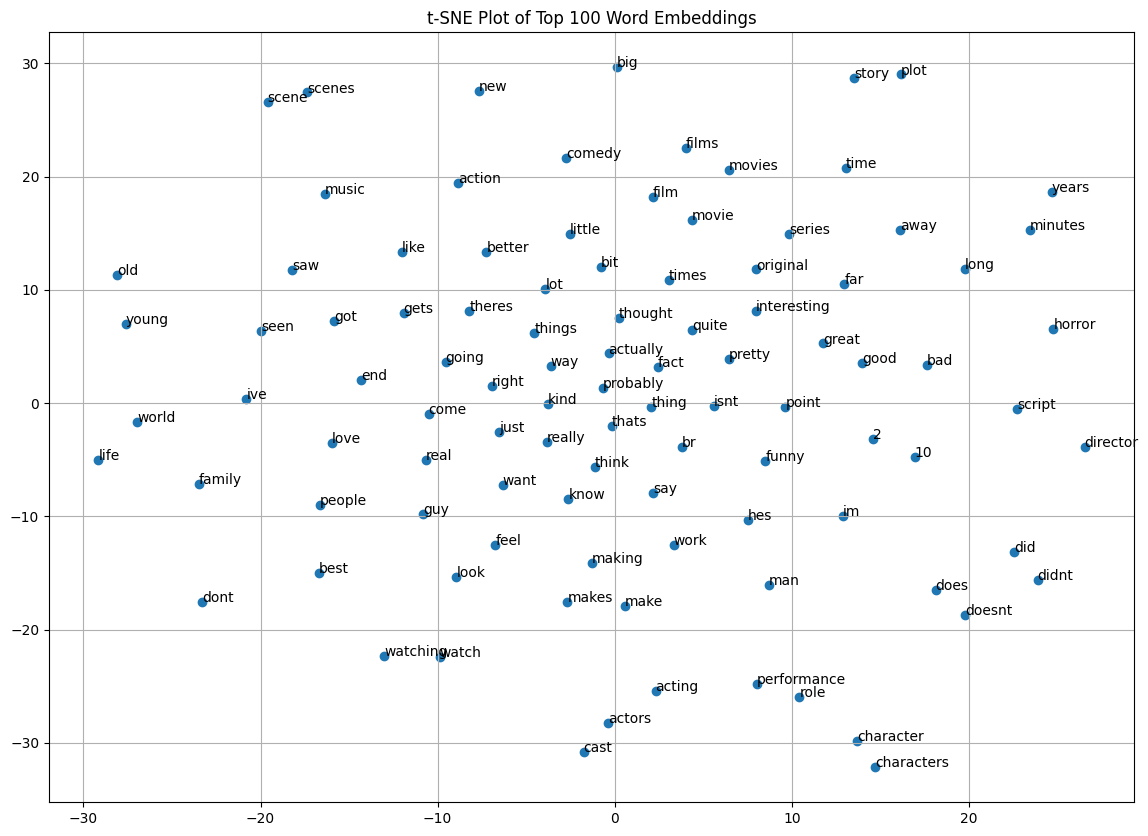

In [ ]:
from sklearn.manifold import TSNE

words = list(w2v_model.wv.key_to_index)[:100]
word_vecs = np.array([w2v_model.wv[word] for word in words])

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(word_vecs)

plt.figure(figsize=(14, 10))
plt.scatter(X_2d[:, 0], X_2d[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(X_2d[i, 0], X_2d[i, 1]))

plt.title("t-SNE Plot of Top 100 Word Embeddings")
plt.grid(True)
plt.show()


 Neural Networks (ANN & CNN)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_ann = Sequential()
model_ann.add(Dense(128, activation='relu', input_shape=(100,)))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.3))
model_ann.add(Dense(1, activation='sigmoid'))

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history_ann = model_ann.fit(X_train_w2v, y_train, epochs=5, batch_size=128, validation_split=0.2)


loss, acc = model_ann.evaluate(X_test_w2v, y_test)
print(f" ANN Test Accuracy: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7150 - loss: 0.5474 - val_accuracy: 0.8310 - val_loss: 0.3830
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8228 - loss: 0.4043 - val_accuracy: 0.8370 - val_loss: 0.3760
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8319 - loss: 0.3832 - val_accuracy: 0.8364 - val_loss: 0.3693
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8419 - loss: 0.3690 - val_accuracy: 0.8392 - val_loss: 0.3670
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8386 - loss: 0.3691 - val_accuracy: 0.8346 - val_loss: 0.3710
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8377 - loss: 0.3659
 ANN Test Accuracy: 0.8402


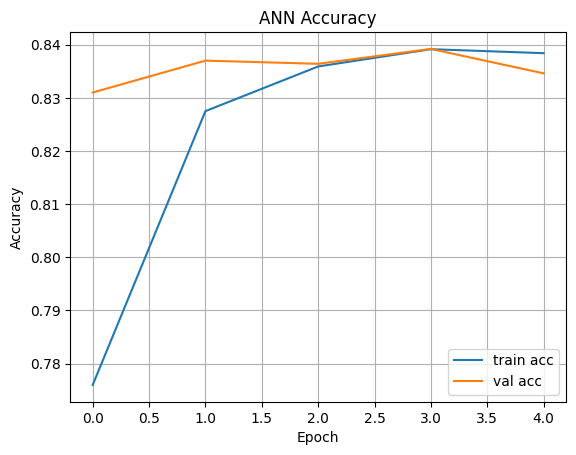

In [ ]:
plt.plot(history_ann.history['accuracy'], label='train acc')
plt.plot(history_ann.history['val_accuracy'], label='val acc')
plt.title('ANN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_clean)

X_train_seq = tokenizer.texts_to_sequences(X_train_clean)
X_test_seq = tokenizer.texts_to_sequences(X_test_clean)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D

model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_cnn = model_cnn.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2)

loss, acc = model_cnn.evaluate(X_test_pad, y_test)
print(f" CNN Test Accuracy: {acc:.4f}")


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 458ms/step - accuracy: 0.6321 - loss: 0.6208 - val_accuracy: 0.8566 - val_loss: 0.3362
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 350ms/step - accuracy: 0.9002 - loss: 0.2636 - val_accuracy: 0.8744 - val_loss: 0.2958
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 79s 331ms/step - accuracy: 0.9637 - loss: 0.1262 - val_accuracy: 0.8728 - val_loss: 0.3272
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 335ms/step - accuracy: 0.9918 - loss: 0.0432 - val_accuracy: 0.8792 - val_loss: 0.3899
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 345ms/step - accuracy: 0.9989 - loss: 0.0130 - val_accuracy: 0.8774 - val_loss: 0.4468
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8593 - loss: 0.4979
 CNN Test Accuracy: 0.8604


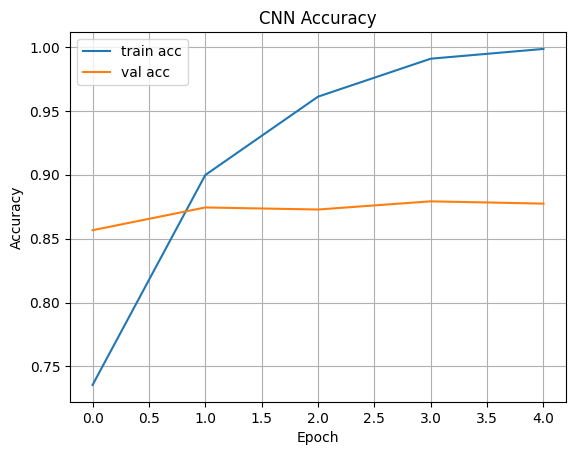

In [ ]:
plt.plot(history_cnn.history['accuracy'], label='train acc')
plt.plot(history_cnn.history['val_accuracy'], label='val acc')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


 Text Summarization

In [ ]:
!pip install summa


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54387 sha256=f2dde14ede6252682c397456e47ded4b358847c0342aeb09c11553763f83b0ec
  Stored in directory: /root/.cache/pip/wheels/10/2d/7a/abce87c4ea233f8dcca0d99b740ac0257eced1f99a124a0e1f
Successfully built summa


In [ ]:
from summa.summarizer import summarize


long_review = ""
for review in X_test_clean:
    if len(review.split()) > 200:
        long_review = review
        break


print(" Original Review (first 500 characters):\n")
print(long_review[:500], "...")

print("\n Summary (TextRank with summa):\n")
print(summarize(long_review, ratio=0.15))


 Original Review (first 500 characters):

animation buffs consider great forgotten genius special branch art puppet animation invented single happened accidentally young man interested cinema attempt film fighting led unexpected breakthrough film making realized movement beetle frame time discovery led production amazingly elaborate classic short revenge russia time motion picture animation sorts br br political russian revolution caused paris productions dark political satire known wanted king strain black comedy films dark aimed grown ...

 Summary (TextRank with summa):


